### Trying Different Simulators, Multi Processing, Time Magic Methods

In [1]:
from qiskit import *
from random import * 

In [2]:
import sys
sys.path.append("..")
from Dependencies.random_circuit_generator import *

In [29]:
n = 5
h = 5
qc_, qr_ = random_circ_h_const(n, h)
qc_.draw()
# qc_.measure_all()

┌───┐   ┌───┐                 ┌───┐     
q_0: ─■─────■──■────────────────■──┤ H ├─■─┤ Z ├─■──────────■──■─┤ Z ├─────
      │     │  │         ┌───┐  │  ├───┤ │ └───┘ │          │  │ └───┘     
q_1: ─■──■──┼──┼───────■─┤ H ├──■──┤ Z ├─┼───────┼───────■──■──┼───────────
      │  │  │  │ ┌───┐ │ └───┘  │  └───┘ │ ┌───┐ │ ┌───┐ │  │  │           
q_2: ─┼──┼──■──┼─┤ Z ├─┼────────┼────────■─┤ H ├─┼─┤ Z ├─┼──┼──■───────────
      │  │  │  │ └───┘ │        │        │ └───┘ │ └───┘ │  │  │      ┌───┐
q_3: ─■──■──■──┼───■───■────────■────────■───────■───────■──■──■───■──┤ H ├
               │   │   │ ┌───┐┌───┐              │       │         │  └───┘
q_4: ──────────■───■───■─┤ H ├┤ Z ├──────────────■───────■─────────■───────
                         └───┘└───┘

In [12]:
print(qc_.depth())
print("Total number of gate: ")
gate_counts(qc_)

6
Total number of gate: 


19

## Trying DDSIM simulator

In [4]:
from mqt import ddsim

In [14]:
%%time 
backend = ddsim.DDSIMProvider().get_backend("qasm_simulator")

job = backend.run(qc_, shots=10)
counts = job.result().get_counts(qc_)
# print(counts)

CPU times: total: 15.6 ms
Wall time: 15 ms


<timed exec>:1: DeprecationWarning: The class ``qiskit.providers.provider.Provider`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.


In [15]:
%%time 
backend = ddsim.DDSIMProvider().get_backend("statevector_simulator")
job = backend.run(qc_)
result = job.result()
print(result.get_statevector())

[0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j
 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
CPU times: total: 31.2 ms
Wall time: 23.5 ms


<timed exec>:1: DeprecationWarning: The class ``qiskit.providers.provider.Provider`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.


In [16]:
provider = ddsim.DDSIMProvider()
available_backends = [str(b) for b in provider.backends()]
print(*available_backends, sep="\n")

C:\Users\isams\AppData\Local\Temp\ipykernel_10668\4011900872.py:1: DeprecationWarning: The class ``qiskit.providers.provider.Provider`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.
  provider = ddsim.DDSIMProvider()


In [17]:
# Actual names of backends
# ['qasm_simulator', 'statevector_simulator', 'hybrid_qasm_simulator', 'hybrid_statevector_simulator', 'path_sim_qasm_simulator', 'path_sim_statevector_simulator', 'unitary_simulator']


#### Drawing Decision Diagram in ddsim

In [1]:
from mqt import ddsim
import graphviz
from qiskit import QuantumCircuit
# from random import * 
import sys
sys.path.append("..")
from Dependencies.random_circuit_generator import *

3 qubit Quantum Fourier Transform

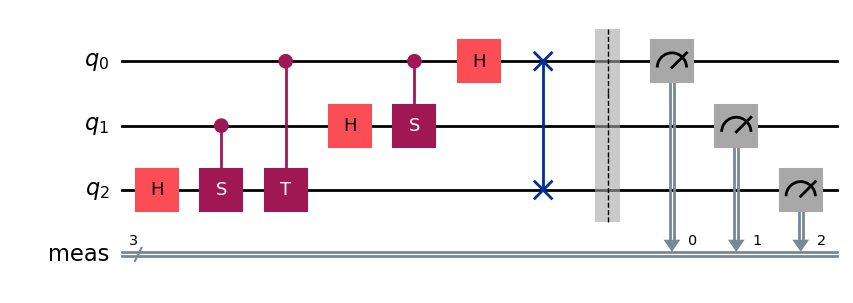

In [29]:
from qiskit.circuit.library import TGate
qc = QuantumCircuit(3)
qc.h(2)
qc.cs(1,2)
ct = TGate().control(1)
qc.append(ct, [0,2])
qc.h(1)
qc.cs(0,1)
qc.h(0)
qc.swap(0,2)
qc.measure_all()
qc.draw('mpl')

Bell State

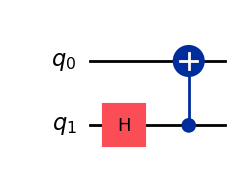

In [2]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw('mpl')

W State

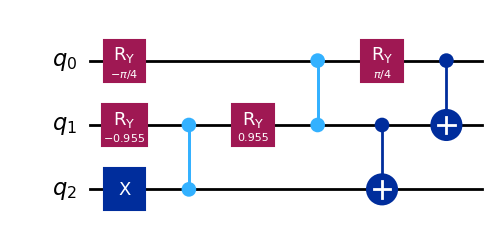

In [3]:
from qiskit import QuantumCircuit
from numpy import pi, arccos, sqrt

qc = QuantumCircuit(3)

qc.x(2)

qc.ry(-arccos(sqrt(1/3)), 1)
qc.cz(2, 1)
qc.ry(arccos(sqrt(1/3)), 1)

qc.ry(-pi/4, 0)
qc.cz(1, 0)
qc.ry(pi/4, 0)

qc.cx(1, 2)
qc.cx(0, 1)
qc.draw('mpl')

In [4]:
# from qiskit.circuit.library import TGate
# qc = QuantumCircuit(3)
# qc.h(2)

In [5]:
sim = ddsim.CircuitSimulator(qc)
sim.simulate(shots=10200940)

{'001': 3398237, '010': 3400927, '100': 3401776}

In [6]:
# sim.export_dd_to_graphviz_file("ddsim_graphviz_exported.dot")
dot = sim.export_dd_to_graphviz_str(colored=True, edge_labels=True, classic=False, memory=False, format_as_polar=True)

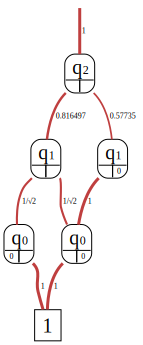

In [14]:
with open("ddsim_graphviz_dd.dot", "w", encoding='utf-8') as f:
    f.write(dot)
graphviz.Source(source=dot)

### Using Qiskit Random Circuit instead of ours on DDSIM

In [14]:
from qiskit.circuit.random import random_circuit

In [27]:
circ = random_circuit(3,5)
circ.draw(fold=-1)

┌───┐       ┌──────────┐            ┌───┐            ┌────────────────────────┐       ┌─────────────────────────┐
q_0: ─────┤ I ├───────┤ P(3.498) ├────────────┤ Y ├────────────┤0                       ├───────┤0                        ├
     ┌────┴───┴─────┐┌┴──────────┴┐           └─┬─┘            │                        │┌─────┐│  (XX+YY)(4.9737,3.8414) │
q_1: ┤0             ├┤ Rz(1.6181) ├─────────────■──────────────┤  (XX-YY)(1.8907,1.959) ├┤ Tdg ├┤1                        ├
     │  Rzx(1.1239) │└─────┬──────┘┌──────────────────────────┐│                        │└┬───┬┘└─────────────────────────┘
q_2: ┤1             ├──────■───────┤ U(4.2577,0.34987,2.2288) ├┤1                       ├─┤ I ├────────────────────────────
     └──────────────┘              └──────────────────────────┘└────────────────────────┘ └───┘

In [28]:
gate_counts(circ)

10

In [29]:
from mqt import ddsim

In [31]:
%%time
backend = ddsim.DDSIMProvider().get_backend("qasm_simulator")

job = backend.run(circ, shots=1000)
counts = job.result().get_counts(circ)
print(counts)

{'0': 268, '100': 205, '101': 333, '110': 194}
CPU times: total: 15.6 ms
Wall time: 16.2 ms


<timed exec>:1: DeprecationWarning: The class ``qiskit.providers.provider.Provider`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.


## Using Qiskit-Aer Simulators

In [ ]:
"""
# Simulating using sampler
from qiskit_aer.primitives import SamplerV2
from qiskit_aer import AerSimulator

sim = AerSimulator()

qc_.measure_all()
qc_qiskit_transpiled = transpile(qc_, sim, optimization_level=2)
# initialization of the sampler
sampler = SamplerV2()

# collect 128 shots from the Bell circuit
job = sampler.run([qc_qiskit_transpiled], shots=128)
job_result = job.result()
# print(job_result)
# print(f"counts for circuit : {job_result[0].data.meas.get_counts()}")
"""

In [3]:
from qiskit_aer import AerSimulator

In [4]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cx(2,1)
qc.z(2)
qc.ccz(0,1,2)
qc.draw()

q_0: ────────────────■─
          ┌───┐      │ 
q_1: ─────┤ X ├──────■─
     ┌───┐└─┬─┘┌───┐ │ 
q_2: ┤ H ├──■──┤ Z ├─■─
     └───┘     └───┘

In [7]:
# %%time
# # Transpile for simulator
# simulator = AerSimulator(method='automatic')
# qc_qiskit_transpiled = transpile(qc, simulator)

# # Run and get counts
# result = simulator.run(qc_qiskit_transpiled, shots=1024).result()
# counts = result.get_counts(qc_qiskit_transpiled)
# # plot_histogram(counts, title='Bell-State counts')
# print(counts)

In [6]:
from qiskit_aer import StatevectorSimulator
backend = StatevectorSimulator()
res = backend.run(qc).result()
print(res.get_statevector())
print(res.get_counts())

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.        +0.j, -0.        +0.j,
             -0.70710678+0.j,  0.        -0.j],
            dims=(2, 2, 2))
{'000': 0.5, '110': 0.5}


## Using Qibo Simulator

In [41]:
# qiskit circuit to qasm3 
import qiskit.qasm2
qc_qasm = qiskit.qasm2.dumps(qc_)

In [42]:
# print(qc_qasm)

In [43]:
# qasm3 to qibo circuit
from qibo import models
qc_qibo = models.Circuit.from_qasm(qc_qasm)

[Qibo 0.2.9|ERROR|2025-02-05 19:43:56]: Unsupported <class 'openqasm3.ast.QuantumBarrier'> statement.


RuntimeError: Unsupported <class 'openqasm3.ast.QuantumBarrier'> statement.

In [24]:
# print(qc_qibo.draw())

In [44]:
# setting backend
import qibo
# backend = qibo.set_backend('qibojit') # for multithreaded
backend = qibo.set_backend('numpy') # for single threaded 
qibo.set_device("/CPU:0")

[Qibo 0.2.9|INFO|2025-02-05 19:44:33]: Using numpy backend on /CPU:0
[Qibo 0.2.9|INFO|2025-02-05 19:44:33]: Using numpy backend on /CPU:0


In [45]:
%%time
final_result = qc_qibo()
print(final_result)

NameError: name 'qc_qibo' is not defined

In [29]:
print(n, d)

20 200


## Using qsimcirq Simulator

In [ ]:
import cirq
import qsimcirq

In [39]:
"""
# Pick up to ~25 qubits to simulate (requires ~256MB of RAM)
qubits = [cirq.GridQubit(i,j) for i in range(5) for j in range(5)]

# Define a circuit to run
# (Example is from the 2019 "Quantum Supremacy" experiement)
circuit = (cirq.experiments.
    random_rotations_between_grid_interaction_layers_circuit(
    qubits=qubits, depth=16))

# Measure qubits at the end of the circuit
circuit.append(cirq.measure(*qubits, key='all_qubits'))

# Simulate the circuit with qsim and return just the measurement values
# just like you would with Cirq
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.run(circuit, repetitions=5)
print('qsim results:')
print(qsim_results)
"""

qsim results:
all_qubits=00011, 00100, 11001, 11111, 01001, 11100, 11111, 10011, 10010, 11111, 01110, 01000, 11000, 01001, 11011, 01001, 10111, 01110, 00111, 11110, 01000, 00111, 01101, 10000, 11111


In [56]:
qc_.draw()

┌───┐                                      ┌───┐               
q_0: ┤ Z ├───────────■──■──────────■──■───────■─┤ Z ├────■──■──■──■─
     └───┘           │  │          │  │ ┌───┐ │ └───┘    │  │  │  │ 
q_1: ────────────────┼──■──■───────■──┼─┤ Z ├─■───■───■──┼──■──┼──┼─
                     │  │  │       │  │ └───┘     │   │  │     │  │ 
q_2: ────────────────┼──■──■───────┼──┼───────────■───■──■─────┼──■─
                     │     │ ┌───┐ │  │ ┌───┐     │   │  │     │  │ 
q_3: ────────────────■─────■─┤ Z ├─┼──┼─┤ Z ├─────┼───┼──■─────■──┼─
     ┌───┐┌───┐┌───┐ │       └───┘ │  │ └───┘     │   │        │  │ 
q_4: ┤ H ├┤ Z ├┤ H ├─■─────────────■──■───────────■───■────────■──■─
     └───┘└───┘└───┘

In [61]:
import qiskit.qasm2
with open('qc_qasm2_file.qasm', 'w') as f:
    f.write(qiskit.qasm2.dumps(qc_))

In [ ]:
from cirq.contrib.qasm_import import circuit_from_qasm
with open('qc_qasm2_file.qasm', 'r') as f:
    contents = f.read()
circuit = circuit_from_qasm(contents)
print(circuit)


cirq does not support 'CCZ' gate

## Trying Qulacs simulator

In [80]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_city

from qiskit_qulacs import QulacsProvider

# Create a bell state
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

# Use Qiskit-Qulacs to run the circuit
backend = QulacsProvider().get_backend("qulacs_simulator")
result = backend.run(qc_, shots=1024, seed_simulator=42).result()
counts = result.get_counts()

# Visualization
# plot_histogram(counts)
# # plt.show()

print(counts)

{'10000': 1024}


C:\Users\isams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit_qulacs\adapter.py:246: UserWarning: qiskit_qulacs.adapter: The CCZGate instruction is not supported by Qiskit-Qulacs and has not been added to the circuit.
  warnings.warn(


Qiskit-qulacs also does not support 'CCZ' gate!!!

## Trying QPanda Simulator 

In [40]:
import qiskit.qasm2
qc_qasm = qiskit.qasm2.dumps(qc_)
with open('qc_qasm3_file.qasm', 'w') as f:
    f.write(qc_qasm)

In [41]:
from pyqpanda import *
machine = init_quantum_machine(QMachineType.CPU)
prog_trans, qv, cv = convert_qasm_to_qprog('qc_qasm3_file.qasm', machine)


In [42]:
%%time
qubits = qv
prog = prog_trans

result = prob_run_dict(prog, qubits, -1)
# print(result)
# finalize()

CPU times: total: 5min 11s
Wall time: 3min 13s


In [13]:
type(result)


dict

## Trying MultiProcessing

In [45]:
import time
from multiprocessing import Pool

In [46]:
# def run_normal(items, do_work):
#     print("running normally on 1 cpu")
#     start_t = time.perf_counter()
#     results = list(map(do_work, items))
#     end_t = time.perf_counter()
#     wall_duration = end_t - start_t
#     print(f"it took: {wall_duration:.2f}s")
#     return results


In [56]:
def run_with_mp_map(items, do_work, processes=2, chunksize=2):
    print(f"running using multiprocessing with {processes=}, {chunksize=}")
    start_t = time.perf_counter()
    with Pool(processes=processes) as pool:
        results = list(pool.imap(do_work, items, chunksize=chunksize))
    end_t = time.perf_counter()
    wall_duration = end_t - start_t
    print(f"it took: {wall_duration:.2f}s")
    return results

In [57]:
items = list(terms)
do_work = truthtable

ttb_multiprocess = run_with_mp_map(items, do_work)

running using multiprocessing with processes=2, chunksize=2


In [55]:
ttb_multiprocess[0:10]

TypeError: 'generator' object is not subscriptable

In [49]:
# def compare_mp_map_to_normal():
#     items = list(terms)
#     do_work = truthtable
#     tt_mp = run_with_mp_map(items, do_work)

#     print()
#     # tt_normal = run_normal(items, do_work)
#     return tt_mp

In [50]:
# tt_mp = compare_mp_map_to_normal()

## Trying to get time of execution using magic methods

In [ ]:
%pinfo %timeit 

In [30]:
variable = %timeit -o sum(range(10000)) 

198 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
type(variable)

IPython.core.magics.execution.TimeitResult

In [32]:
%pinfo variable

Type:        TimeitResult
String form: 198 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
File:        c:\users\isams\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\ipython\core\magics\execution.py
Docstring:  
Object returned by the timeit magic with info about the run.

Contains the following attributes :

loops: (int) number of loops done per measurement
repeat: (int) number of times the measurement has been repeated
best: (float) best execution time / number
all_runs: (list of float) execution time of each run (in s)
compile_time: (float) time of statement compilation (s)

In [33]:
print(variable.compile_time)

0.0


### Capturing the %%time and extracting the time

In [1]:
%%capture time1
%%time

# Your code here
x = [i**2 for i in range(1000)]


In [27]:
%%capture time2
%%time
import time
import numpy as np

# Your code here
y = np.array([[[i] for i in range(25000)][j] for j in range(25000)] )


#### Getting time in ms

In [115]:
# Extract the runtime information from the captured output
import re

def extract_time(capture_output):
    output = capture_output.stdout
    time_pattern = r"(\d+\.\d+) (s|ms)"
    match = re.search(time_pattern, output)
    if match:
        time_value = float(match.group(1))
        time_unit = match.group(2)
        # Convert to milliseconds if necessary
        if time_unit == "ns":
            time_value /= 1_000_000  # ns to ms
        elif time_unit == "µs":
            time_value /= 1_000      # µs to ms
        elif time_unit == "s":
            time_value *= 1_000      # s to ms
        elif time_unit == "min":
            time_value *= 60_000     # min to ms
        return time_value
    return None

time1_ms = extract_time(time1)
time2_ms = extract_time(time2)


In [116]:
print(time1)

CPU times: total: 0 ns
Wall time: 2 ms



In [117]:
import pandas as pd

# Create a DataFrame to store the results
run_times = pd.DataFrame({
    "Cell": ["Cell 1", "Cell 2"],
    "Run Time (ms)": [time1_ms, time2_ms]
})

run_times


,Cell,Run Time (ms)
0,Cell 1,NaN
1,Cell 2,56500.0


#### Getting CPU time and Wall time in different units

In [37]:
import re

def extract_times(capture_output):
    output = capture_output.stdout
    
    # Patterns to match various formats of wall time and CPU time
    wall_time_pattern = r"Wall time: (\d+\.?\d*) (ns|µs|ms|s|min|h)"
    wall_time_complex_pattern = r"Wall time: ((\d+min\s)?\d+\.?\d*s)"
    cpu_time_pattern = r"CPU times: total: (\d+\.?\d*) (ns|µs|ms|s|min|h)"
    cpu_time_complex_pattern = r"CPU times: total: ((\d+min\s)?\d+\.?\d*s)"
    
    def convert_to_seconds(time_str):
        total_seconds = 0
        if 'min' in time_str:
            minutes = int(re.search(r"(\d+)min", time_str).group(1))
            total_seconds += minutes * 60
        if 's' in time_str:
            seconds = float(re.search(r"(\d+\.?\d*)s", time_str).group(1))
            total_seconds += seconds
        return total_seconds, 's'
    
    # Extract wall time
    wall_match = re.search(wall_time_pattern, output)
    wall_complex_match = re.search(wall_time_complex_pattern, output)
    if wall_match:
        wall_time_value = float(wall_match.group(1))
        wall_time_unit = wall_match.group(2)
    elif wall_complex_match:
        wall_time_value, wall_time_unit = convert_to_seconds(wall_complex_match.group(1))
    else:
        wall_time_value, wall_time_unit = None, None
    
    # Extract CPU time
    cpu_match = re.search(cpu_time_pattern, output)
    cpu_time_complex_match = re.search(cpu_time_complex_pattern, output)
    if cpu_match:
        cpu_time_value = float(cpu_match.group(1))
        cpu_time_unit = cpu_match.group(2)
    elif cpu_time_complex_match:
        cpu_time_value, cpu_time_unit = convert_to_seconds(cpu_time_complex_match.group(1))
    else:
        cpu_time_value, cpu_time_unit = None, None
    
    return wall_time_value, wall_time_unit, cpu_time_value, cpu_time_unit

# Example usage with time1 and time2 as the captured outputs
wall_time1_value, wall_time1_unit, cpu_time1_value, cpu_time1_unit = extract_times(time1)
wall_time2_value, wall_time2_unit, cpu_time2_value, cpu_time2_unit = extract_times(time2)


In [31]:
# Cell 4: Create a table of run times
import pandas as pd

# Create a DataFrame to store the results
run_times = pd.DataFrame({
    "Cell": ["Cell 1", "Cell 2"],
    "Wall Time": [wall_time1_value, wall_time2_value],
    "Wall Time Unit": [wall_time1_unit, wall_time2_unit],
    "CPU Time": [cpu_time1_value, cpu_time2_value],
    "CPU Time Unit": [cpu_time1_unit, cpu_time2_unit]
})

run_times


     Cell  Wall Time Wall Time Unit  CPU Time CPU Time Unit
0  Cell 1        1.0             ms       0.0            ns
1  Cell 2      363.0              s     223.0             s


In [28]:
print(time1)

CPU times: total: 0 ns
Wall time: 1 ms



In [29]:
print(time2)

CPU times: total: 3min 43s
Wall time: 6min 3s



#### Other methods

In [17]:
%%time
# Your code here
for _ in range(1000000):
    pass

CPU times: total: 78.1 ms
Wall time: 65.7 ms


In [33]:
def sum_of_squares(n):
    total = 0
    for i in range(n):
        total += i * i
    return total

In [9]:
%%time
# Example usage of the function
result = sum_of_squares(10**7)

CPU times: total: 484 ms
Wall time: 1.59 s


In [10]:
import psutil
import time

def sum_of_squares(n):
    total = 0
    for i in range(n):
        total += i * i
    return total

# Capture start times
# start_cpu_times = psutil.cpu_times() # --> gives cpu_time > wall_time
start_cpu_times = psutil.Process().cpu_times()
start_time = time.time()

# Call the function
result = sum_of_squares(10**7)

# Capture end times
end_cpu_times = psutil.Process().cpu_times()
end_time = time.time()

# Calculate user and system CPU times
user_time = end_cpu_times.user - start_cpu_times.user
system_time = end_cpu_times.system - start_cpu_times.system
total_cpu_time = user_time + system_time
wall_time = end_time - start_time

print(f"User CPU time: {user_time} seconds")
print(f"System CPU time: {system_time} seconds")
print(f"Total CPU time: {total_cpu_time} seconds")
print(f"Wall time: {wall_time} seconds")


User CPU time: 0.265625 seconds
System CPU time: 0.0 seconds
Total CPU time: 0.265625 seconds
Wall time: 1.4509046077728271 seconds


### Plotting a small manual observation

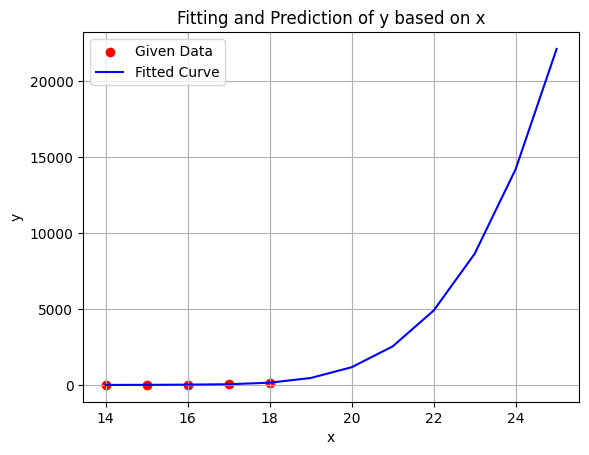

array([  462.        ,  1171.        ,  2540.99999999,  4896.99999999,
        8628.99999998, 14191.99999997, 22105.99999994])

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Correct the x and y arrays to match their lengths
x = np.array([14, 15, 16, 17, 18])
y = np.array([7, 11, 26, 52, 154])

# Define a polynomial of degree 4
coefficients = np.polyfit(x, y, 4)
poly_func = np.poly1d(coefficients)

# Generate x values for prediction and plotting
x_pred = np.arange(14, 26, 1)
y_pred = poly_func(x_pred)

# Plotting the given points and the fit
plt.scatter(x, y, color='red', label='Given Data')
plt.plot(x_pred, y_pred, color='blue', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting and Prediction of y based on x')
plt.grid(True)
plt.show()

# Predicted values for x = 20, 21, 22, 23, 24, 25
predicted_values = poly_func(np.array([19, 20, 21, 22, 23, 24, 25]))
predicted_values
